Rahul Kumar Mandal

# Theory

Sound waves are represented as signals, with sine waves producing smooth, pure tones and square waves characterized by sharp transitions. This study demonstrates the generation, manipulation, and analysis of waveforms using Python, emphasizing key concepts in signal processing.

Sine waves, represented by $y(t) = A \cdot \sin(2 \pi f t)$, and square waves, generated using $y(t) = A \cdot \text{sign}(\sin(2 \pi f t))$, were synthesized with specified frequencies and amplitudes. Frequency manipulation techniques, such as pitch shifting, illustrated how altering wave parameters can double or halve frequencies, a principle widely applied in audio processing. Additive synthesis, achieved by combining sine and square waves $y_{\text{combined}}(t) = y_1(t) + y_2(t)$, showcased the practical utility of waveform composition in creating complex signals for audio synthesis and telecommunications.

To address real-world challenges, high-frequency noise was introduced to clean signals, creating noisy waveforms. A low-pass Butterworth filter, governed by:

$$H(f) = \frac{1}{\sqrt{1 + \left(\frac{f}{f_c}\right)^{2n}}},$$

was designed to remove noise, demonstrating effective signal restoration. Visualizations of clean, noisy, and filtered signals provided insights into the transformative effects of filtering on signal quality.

These experiments highlight the foundational importance of signal generation, frequency manipulation, and noise reduction in fields such as audio engineering, telecommunications, and digital signal processing. The project underscores Python's versatility as a powerful tool for signal processing, blending theoretical concepts with practical applications to deepen understanding and enhance technical skills.

The use of Python libraries such as `numpy` for mathematical operations, `matplotlib` for visualizing waveforms, and `scipy` for filter design makes these tasks straightforward and efficient. These techniques are essential in fields like music production, sound design, and communication systems.


## Read and Play Audio File

In [44]:
import audiofile
signal, sampling_rate = audiofile.read("/Users/rahulkumarmandal/Downloads/EEC/7th Sem/MULTIMEDIA/JUPYTER/your_audio_file.mp3")
sampling_rate,signal





(44100,
 array([[ 0.0000000e+00,  3.8622382e-13, -2.3732453e-12, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00,  6.7071674e-13,  3.3309683e-13, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00]],
       shape=(2, 4066560), dtype=float32))

## Determine Length of the First Sample in Audio Signal

In [7]:
len(signal[0])

4066560

## Audio File Reading, Mono Conversion, and Playback

In [15]:
import numpy as np
import audiofile as af
import sounddevice as sd

# Path to your audio file
audio_path = "/Users/rahulkumarmandal/Downloads/EEC/7th Sem/MULTIMEDIA/JUPYTER/your_audio_file.mp3"

# Read the audio file
signal, sampling_rate = af.read(audio_path)
print(f"Original Signal Shape: {signal.shape}")
print(f"Sampling Rate: {sampling_rate} Hz")

# Handle multi-channel audio by converting it to mono
if len(signal.shape) > 1:  # If more than one channel
    signal = np.mean(signal, axis=1)  # Convert to mono
    print(f"Converted to Mono Signal Shape: {signal.shape}")

# Play the audio file
print("Playing audio...")
sd.play(signal, samplerate=sampling_rate)
sd.wait()  # Wait until playback finishes
print("Audio playback finished.")

Original Signal Shape: (2, 4066560)
Sampling Rate: 44100 Hz
Converted to Mono Signal Shape: (2,)
Playing audio...
Audio playback finished.


## Sine Wave Generation and Plotting

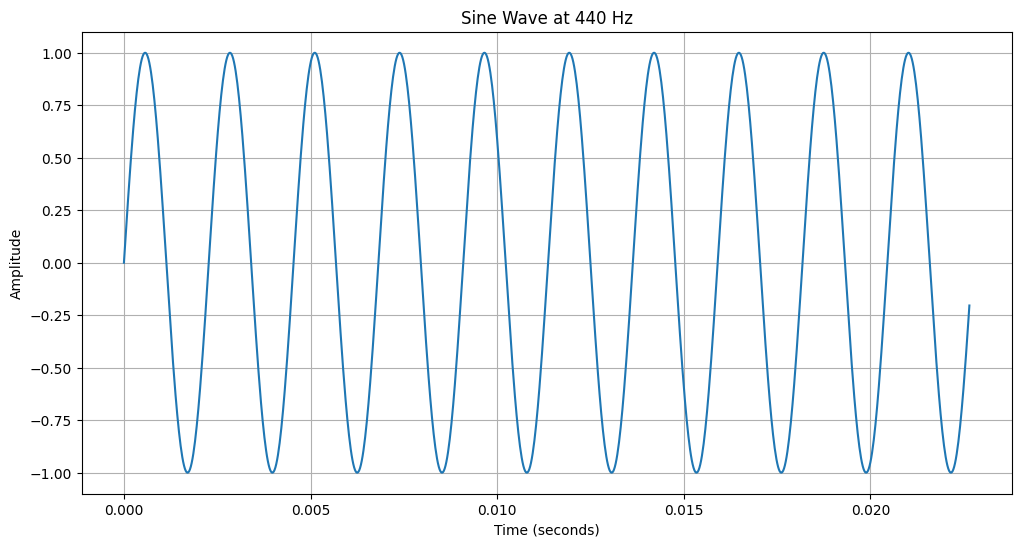

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
frequency = 440  # Frequency in Hz
sampling_rate = 44100  # Sampling rate in Hz
duration = 5.0  # Duration in seconds

# Generate time points
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Generate sine wave
sine_wave = np.sin(2 * np.pi * frequency * t)

# Plot the waveform
plt.figure(figsize=(12, 6))
plt.plot(t[:1000], sine_wave[:1000])  # Plot the first 1000 samples for better visibility
plt.title("Sine Wave at 440 Hz")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

## Square Wave Generation and Frequency Manipulation

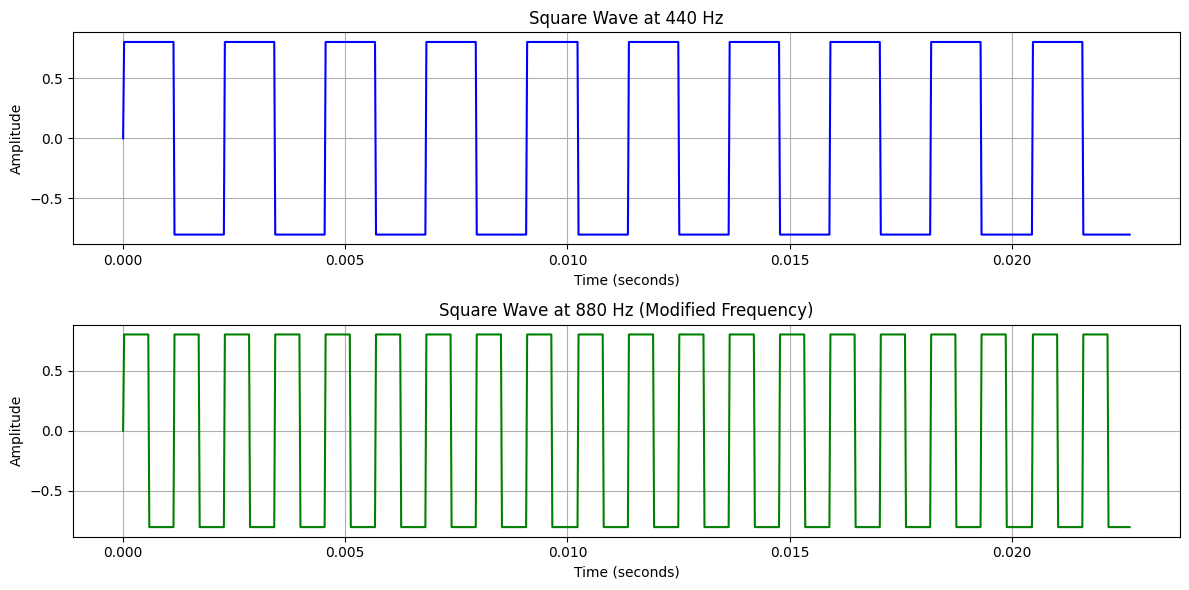

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
frequency = 440  # Frequency in Hz
amplitude = 0.8  # Amplitude (0 to 1)
sampling_rate = 44100  # Sampling rate in Hz
duration = 5.0  # Duration in seconds

# Generate time points
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Generate square wave
square_wave = amplitude * np.sign(np.sin(2 * np.pi * frequency * t))

# Manipulate frequency (double it for demonstration)
new_frequency = 880  # New frequency in Hz
square_wave_new = amplitude * np.sign(np.sin(2 * np.pi * new_frequency * t))

# Plot the original and modified square waves
plt.figure(figsize=(12, 6))

# Original square wave
plt.subplot(2, 1, 1)
plt.plot(t[:1000], square_wave[:1000], color="blue")
plt.title("Square Wave at 440 Hz")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid()

# Modified square wave (new frequency)
plt.subplot(2, 1, 2)
plt.plot(t[:1000], square_wave_new[:1000], color="green")
plt.title("Square Wave at 880 Hz (Modified Frequency)")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid()

plt.tight_layout()
plt.show()

## Low-Pass Filtering to Remove High-Frequency Noise

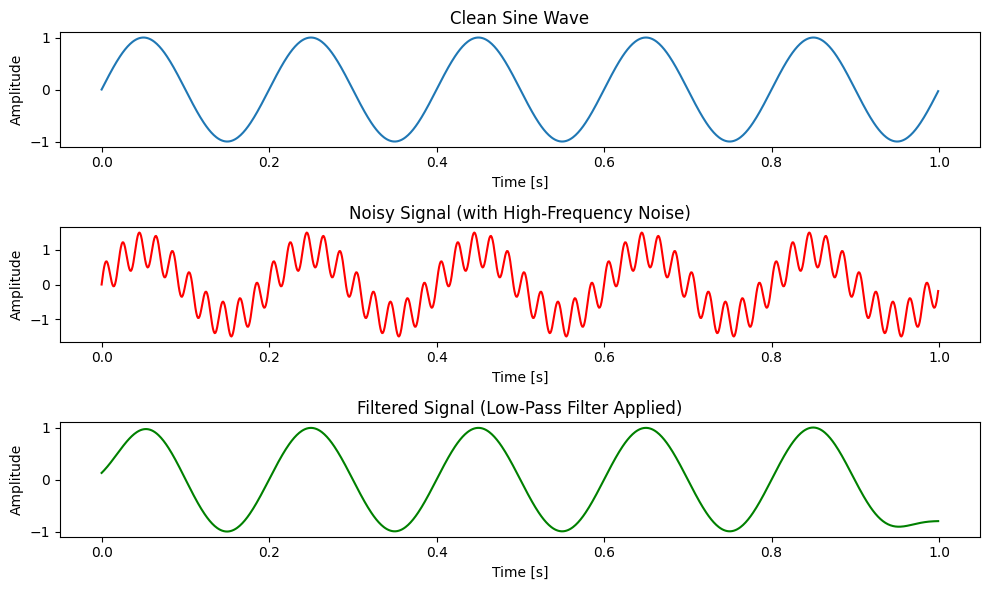

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Step 1: Generate a noisy sine wave
fs = 1000  # Sampling frequency (samples per second)
t = np.arange(0, 1, 1/fs)  # Time vector
f_signal = 5  # Frequency of the sine wave in Hz
f_noise = 50  # Frequency of the noise in Hz

# Generate a clean sine wave
clean_signal = np.sin(2 * np.pi * f_signal * t)

# Add noise (high-frequency component)
noise = 0.5 * np.sin(2 * np.pi * f_noise * t)

# Noisy signal
noisy_signal = clean_signal + noise

# Step 2: Design a low-pass filter
def butter_lowpass(cutoff, fs, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

# Apply the low-pass filter to remove high-frequency noise
cutoff_frequency = 10  # Cutoff frequency for the low-pass filter
b, a = butter_lowpass(cutoff_frequency, fs)

# Apply the filter using filtfilt (zero-phase filtering)
filtered_signal = filtfilt(b, a, noisy_signal)

# Step 3: Plot the results
plt.figure(figsize=(10, 6))

# Plot the clean signal
plt.subplot(3, 1, 1)
plt.plot(t, clean_signal, label='Clean Sine Wave')
plt.title('Clean Sine Wave')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

# Plot the noisy signal
plt.subplot(3, 1, 2)
plt.plot(t, noisy_signal, label='Noisy Signal', color='r')
plt.title('Noisy Signal (with High-Frequency Noise)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

# Plot the filtered signal
plt.subplot(3, 1, 3)
plt.plot(t, filtered_signal, label='Filtered Signal', color='g')
plt.title('Filtered Signal (Low-Pass Filter Applied)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

## Pitch Shifting of a Sine Wave

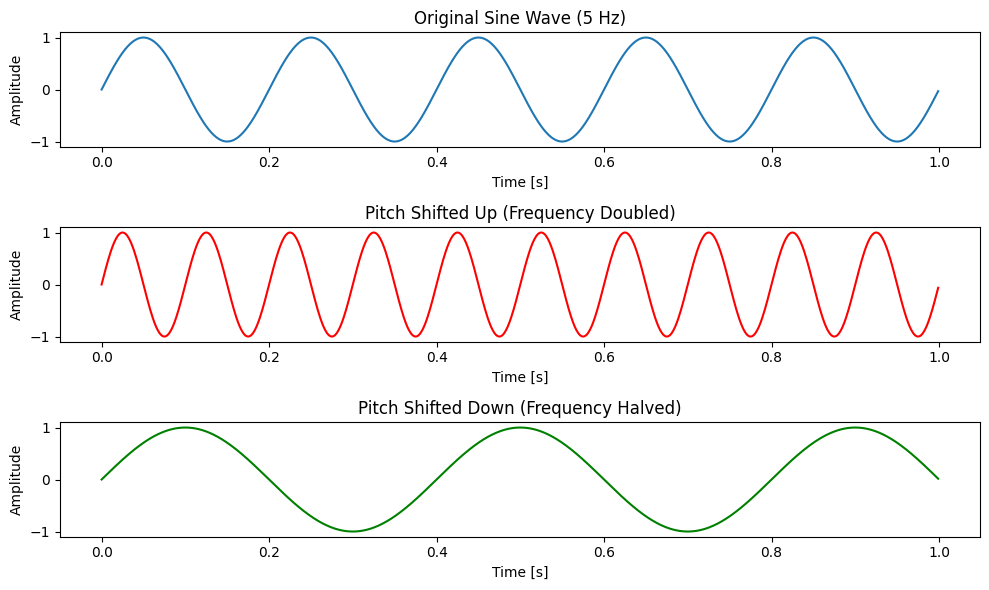

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate a sine wave
fs = 1000  # Sampling frequency (samples per second)
t = np.arange(0, 1, 1/fs)  # Time vector
f_original = 5  # Original frequency of the sine wave (in Hz)

# Generate the original sine wave
original_signal = np.sin(2 * np.pi * f_original * t)

# Step 2: Apply pitch shifting
# Shift the pitch up and down by a factor
pitch_up_factor = 2  # Shift the pitch up by a factor of 2 (10 Hz)
pitch_down_factor = 0.5  # Shift the pitch down by a factor of 0.5 (2.5 Hz)

# Create the pitch-shifted signals
shifted_up_signal = np.sin(2 * np.pi * f_original * pitch_up_factor * t)
shifted_down_signal = np.sin(2 * np.pi * f_original * pitch_down_factor * t)

# Step 3: Plot the results
plt.figure(figsize=(10, 6))

# Plot the original sine wave
plt.subplot(3, 1, 1)
plt.plot(t, original_signal, label='Original Sine Wave')
plt.title('Original Sine Wave (5 Hz)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

# Plot the pitch-shifted up signal
plt.subplot(3, 1, 2)
plt.plot(t, shifted_up_signal, label='Pitch Shifted Up (10 Hz)', color='r')
plt.title('Pitch Shifted Up (Frequency Doubled)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

# Plot the pitch-shifted down signal
plt.subplot(3, 1, 3)
plt.plot(t, shifted_down_signal, label='Pitch Shifted Down (2.5 Hz)', color='g')
plt.title('Pitch Shifted Down (Frequency Halved)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

## Combination of Sine and Square Waves

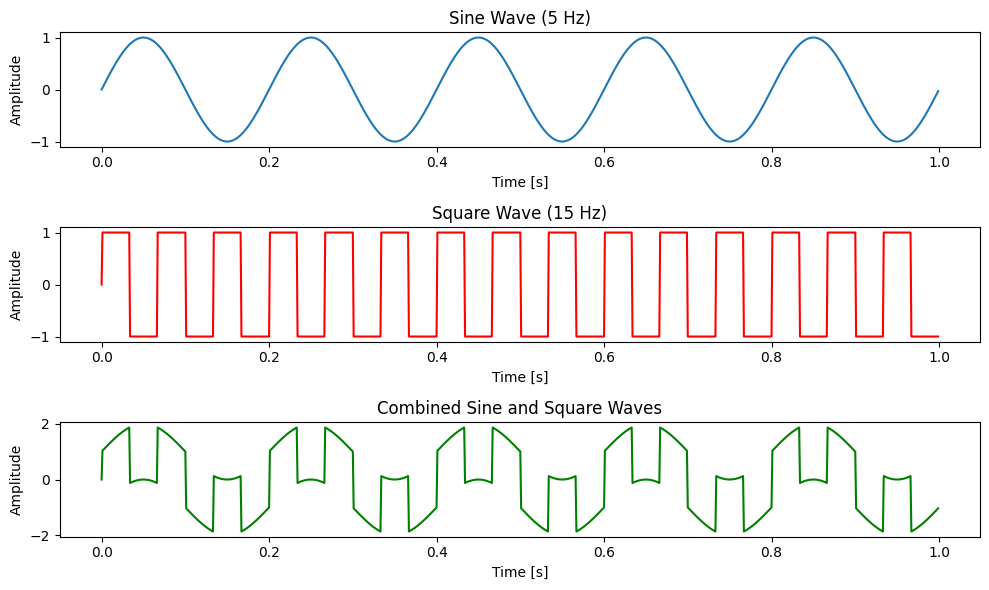

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
fs = 1000  # Sampling frequency (samples per second)
t = np.arange(0, 1, 1/fs)  # Time vector

# Original frequencies
f_sine = 5  # Frequency of the sine wave (in Hz)
f_square = 15  # Frequency of the square wave (in Hz)

# Generate the individual waveforms
sine_wave = np.sin(2 * np.pi * f_sine * t)
square_wave = np.sign(np.sin(2 * np.pi * f_square * t))  # Square wave with 15 Hz

# Combine the sine and square waves (simple addition)
combined_wave = sine_wave + square_wave

# Plot the results
plt.figure(figsize=(10, 6))

# Plot the sine wave
plt.subplot(3, 1, 1)
plt.plot(t, sine_wave, label=f'Sine Wave ({f_sine} Hz)')
plt.title('Sine Wave (5 Hz)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

# Plot the square wave
plt.subplot(3, 1, 2)
plt.plot(t, square_wave, label=f'Square Wave ({f_square} Hz)', color='r')
plt.title('Square Wave (15 Hz)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

# Plot the combined wave
plt.subplot(3, 1, 3)
plt.plot(t, combined_wave, label='Combined Waveform', color='g')
plt.title('Combined Sine and Square Waves')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

                                            THE END